In [1]:
#binary classification with a bank churn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

#loading training and test data
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

In [3]:
#looking at the correlations
train_set.corr()['Exited'].sort_values(ascending = False)

Exited             1.000000
Age                0.340768
Balance            0.129743
EstimatedSalary    0.018827
id                 0.002512
CustomerId        -0.009947
Tenure            -0.019565
HasCrCard         -0.022141
CreditScore       -0.027383
IsActiveMember    -0.210237
NumOfProducts     -0.214554
Name: Exited, dtype: float64

In [4]:
#information about the training set

train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [5]:

#describing the numerical attributes
train_set.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


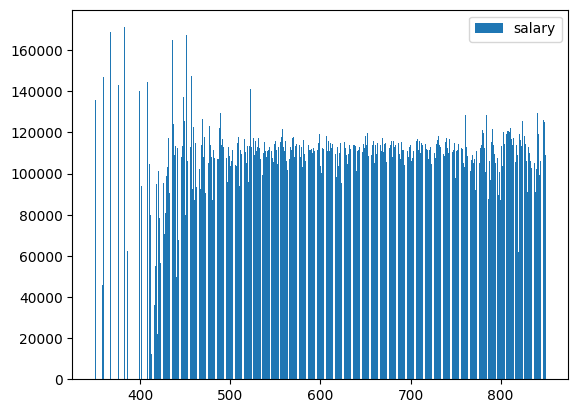

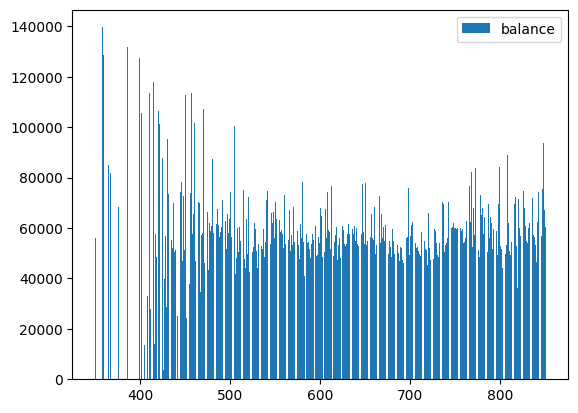

In [6]:
#analyzing different columns looking for edge

credit = train_set.groupby(['CreditScore']).mean()



plt.bar(credit.index, credit['EstimatedSalary'], label = 'salary')
plt.legend()
plt.show()
plt.bar(credit.index, credit['Balance'], label = 'balance')
plt.legend()
plt.show()

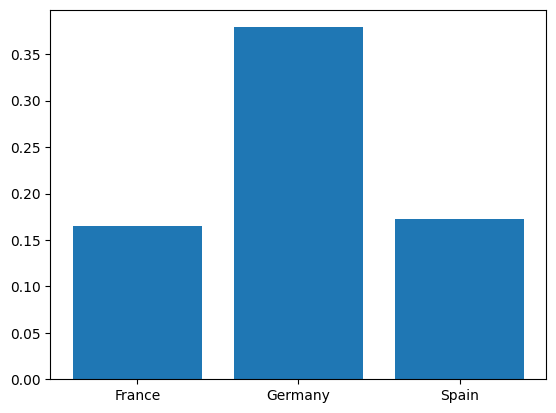

In [7]:

#analyzing location

locale = train_set.groupby(['Geography']).mean()
locale

plt.bar(locale.index, locale['Exited'])
plt.show()

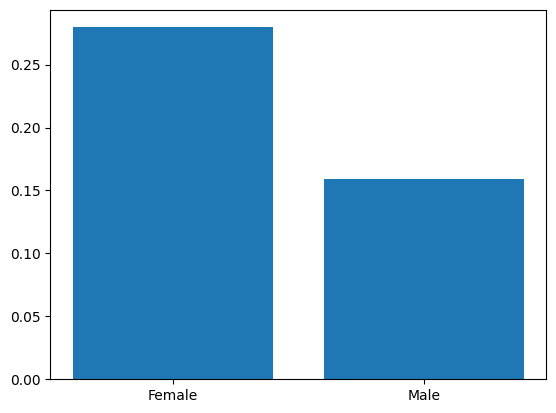

In [8]:
gend = train_set.groupby(['Gender']).mean()
gend

plt.bar(gend.index, gend['Exited'])
plt.show()

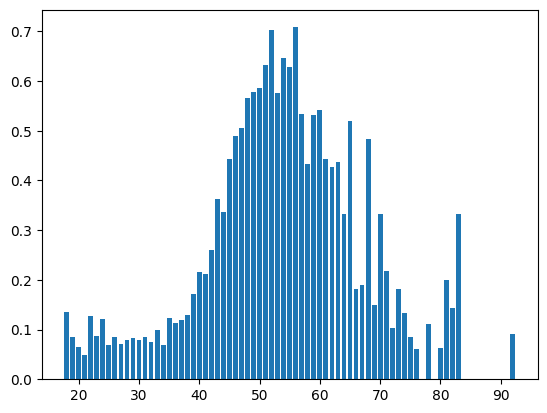

In [9]:
age = train_set.groupby(['Age']).mean()


plt.bar(age.index, age['Exited'])
plt.show()

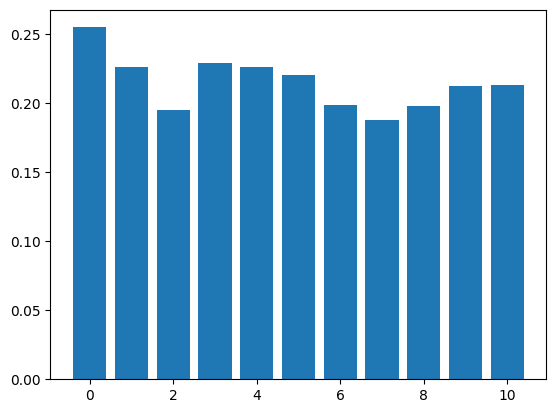

In [10]:
tenure = train_set.groupby(['Tenure']).mean()

plt.bar(tenure.index, tenure['Exited'])
plt.show()

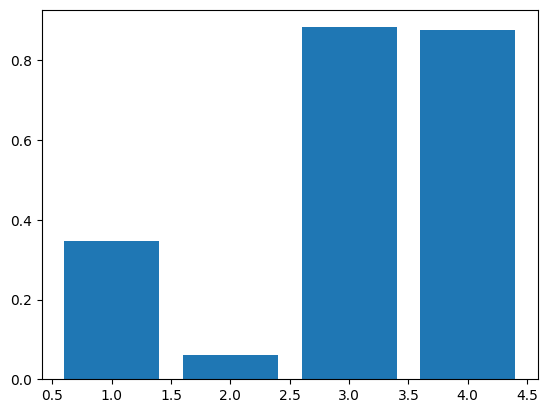

In [11]:

products = train_set.groupby(['NumOfProducts']).mean()

plt.bar(products.index, products['Exited'])
plt.show()

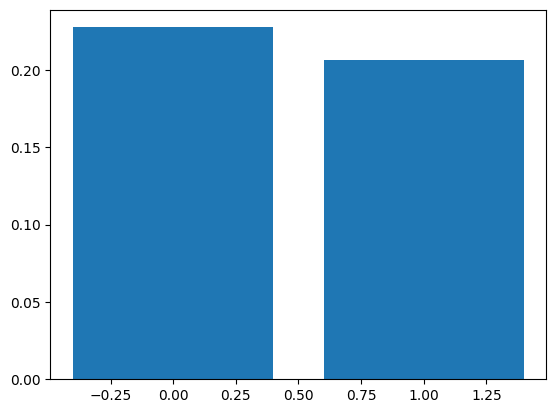

In [12]:


cr = train_set.groupby(['HasCrCard']).mean()

plt.bar(cr.index, cr['Exited'])
plt.show()

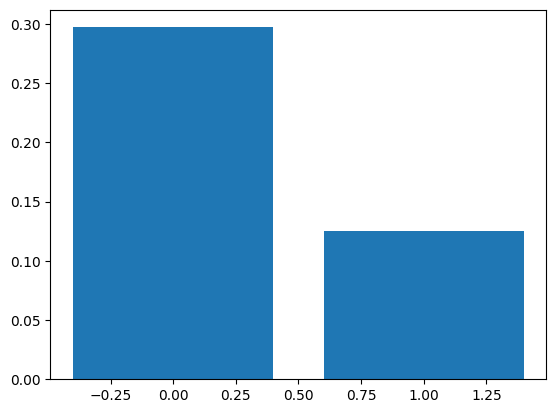

In [13]:

member = train_set.groupby(['IsActiveMember']).mean()

plt.bar(member.index, member['Exited'])
plt.show()

In [14]:
def new_features(df):
    new_df = df.copy()
    bins = [0, 20000, 40000, 200000]
    labels = [1, 2, 3]

    # Categorize values into bins and create a new column 'SalaryCategory'
    new_df['new_balance'] = pd.cut(new_df['Balance'], bins=bins, labels=labels, right=False)
    new_df['balance_group'] =  (new_df['new_balance']>=2).astype(int)
    new_df['locale'] = (new_df['Geography']=='Germany').astype(int)
    new_df['older'] = (new_df['Age']>=43).astype(int)
    new_df['credit_card'] = (new_df['HasCrCard']<=0.5).astype(int)
    new_df['member'] = (new_df['IsActiveMember']<=0.5).astype(int)
    new_df['buyer'] = (new_df['NumOfProducts']>=2.5).astype(int)
    new_df['locale_gender'] = ((new_df['Geography']=='Germany') &(new_df['Gender']=='Female') ).astype(int)
    new_df['new_credit'] = (new_df['CreditScore']<=600).astype(int)
    new_df['gen'] = (new_df['Gender']=='Female').astype(int)
    return new_df





In [15]:
new_train_set = new_features(train_set)



In [16]:
important = [i for i in new_train_set.columns if i!='Exited']

In [17]:
new_train_set = new_train_set[important]

In [18]:
new_train_set

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,new_balance,balance_group,locale,older,credit_card,member,buyer,locale_gender,new_credit,gen
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,...,1,0,0,0,0,1,0,0,0,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,...,1,0,0,0,0,0,0,0,0,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,...,1,0,0,0,0,1,0,0,0,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,...,3,1,0,0,0,0,0,0,1,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,...,1,0,0,0,0,0,0,0,0,1
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,...,1,0,0,0,1,1,0,0,0,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,...,1,0,0,0,0,0,0,0,1,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,...,3,1,0,0,1,0,0,0,1,1


In [19]:
object_columns = new_train_set.select_dtypes(include = ['object']).columns
numeric_columns = new_train_set.select_dtypes(include = ['int64', 'float64']).columns


In [20]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler

num_pipeline= Pipeline([
    ('scaler', MinMaxScaler()),
    ('polynomial', PolynomialFeatures(degree=3, interaction_only=True, include_bias=False))
])

cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

column_pipeline = ColumnTransformer([
    ('numeric', num_pipeline, numeric_columns), 
    ('cat', cat_pipeline, object_columns)
])

random_forest_pipeline = Pipeline([
    ('transformer', column_pipeline), 
    ('classifier', RandomForestClassifier(random_state = 42))
])

sgdclassifier = Pipeline([
    ('transformer', column_pipeline), 
    ('classifier', SGDClassifier(penalty = 'l2',alpha = 0.01, eta0 = 0.01, random_state = 42))
])


In [21]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = Pipeline([
    ('transformer', column_pipeline), 
    ('classifier', DecisionTreeClassifier(random_state = 42))
])


In [22]:
from sklearn.model_selection import train_test_split

X = new_train_set
y = (train_set['Exited'])
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
sgdclassifier.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('polynomial',
                                                                   PolynomialFeatures(degree=3,
                                                                                      include_bias=False,
                                                                                      interaction_only=True))]),
                                                  Index(['id', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'balance_group', 'locale', 'older', 'credit_card', 'member', 'buyer',
       'locale_gender', 'new_credit', 'gen'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Surname', 'Geography', 'Gender'], dtype='object'))])),
                ('classifier',
                 SGDClassifier(alpha=0.01, eta0=0.01, random_state=42))])

In [24]:
random_forest_pipeline.fit(X_train, y_train)



Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('polynomial',
                                                                   PolynomialFeatures(degree=3,
                                                                                      include_bias=False,
                                                                                      interaction_only=True))]),
                                                  Index(['id', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'balance_group', 'locale', 'older', 'credit_card', 'member', 'buyer',
       'locale_gender', 'new_credit', 'gen'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Surname', 'Geography', 'Gender'], dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [25]:
decisiontree.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('polynomial',
                                                                   PolynomialFeatures(degree=3,
                                                                                      include_bias=False,
                                                                                      interaction_only=True))]),
                                                  Index(['id', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'balance_group', 'locale', 'older', 'credit_card', 'member', 'buyer',
       'locale_gender', 'new_credit', 'gen'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Surname', 'Geography', 'Gender'], dtype='object'))])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [26]:
y_train.value_counts()

0    104061
1     27966
Name: Exited, dtype: int64

In [27]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

y_pred = cross_val_predict(random_forest_pipeline, X_train, y_train, cv = 5)

confusion_matrix(y_train, y_pred)

array([[98411,  5650],
       [12867, 15099]])

In [28]:
y_pred = cross_val_predict(sgdclassifier, X_train, y_train, cv = 5)

confusion_matrix(y_train, y_pred)

array([[100497,   3564],
       [ 16139,  11827]])

In [29]:
from sklearn.metrics import f1_score

f1 = f1 = f1_score(y_train, y_pred,average = 'weighted')
f1

0.8333754110563877

In [30]:
y_pred = cross_val_predict(decisiontree, X_train, y_train, cv = 5)

confusion_matrix(y_train, y_pred)

In [ ]:
from sklearn.metrics import f1_score
test_result = random_forest_pipeline.predict(X_test)
f1 = f1_score(y_test, test_result,average = 'weighted')
f1

0.852626543689477

In [ ]:
test_set.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [ ]:
new_test_set = new_features(test_set)
new_test_set = new_test_set[important]

In [ ]:
test_result = sgdclassifier.predict(new_test_set)


In [ ]:
new_test_set

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,IsActiveMember,EstimatedSalary,new_balance,balance_group,locale,older,credit_card,member,buyer,locale_gender
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,...,1.0,160976.75,1,0,0,0,1,0,0,0
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,...,0.0,72549.27,1,0,0,1,0,1,0,0
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,...,0.0,138882.09,1,0,0,0,0,1,0,0
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,...,0.0,113931.57,1,0,0,0,0,1,0,0
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,...,0.0,139431.00,3,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,...,1.0,148087.62,3,1,0,0,0,0,0,0
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,...,1.0,42181.68,3,1,0,0,0,0,0,0
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,...,0.0,16287.38,1,0,0,0,0,1,0,0
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,...,1.0,158816.58,1,0,0,0,0,0,0,0


In [ ]:
ans_df = pd.DataFrame({'id':new_test_set['id'], 'Exited':test_result})

ans_df.to_csv('submission.csv', index = False)

In [ ]:
ans_df.shape

(110023, 2)